## Project 6

In [52]:
import os
import subprocess
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import scipy
import requests
from imdbpie import Imdb
import nltk
import matplotlib.pyplot as plt
import urllib
from bs4 import BeautifulSoup
import nltk
import collections
import re
import csv
import psycopg2

%matplotlib inline

### Pre-Work: Write a problem statement 

## Part 1: Acquire the Data

#### 1. Connect to the IMDB API

In [4]:
imdb = Imdb()
imdb = Imdb(anonymize=True)

#### 2. Query the top 250 rated movies in the database

In [5]:
movies = pd.DataFrame(imdb.top_250())

In [6]:
movies.head()

,can_rate,image,num_votes,rating,tconst,title,type,year
0,True,"{'width': 933, 'height': 1388, 'url': 'http://...",1633949,9.3,tt0111161,The Shawshank Redemption,feature,1994
1,True,"{'width': 333, 'height': 500, 'url': 'http://i...",1118830,9.2,tt0068646,The Godfather,feature,1972
2,True,"{'width': 333, 'height': 500, 'url': 'http://i...",762911,9.0,tt0071562,The Godfather: Part II,feature,1974
3,True,"{'width': 1383, 'height': 2048, 'url': 'http:/...",1616437,9.0,tt0468569,The Dark Knight,feature,2008
4,True,"{'width': 439, 'height': 679, 'url': 'http://i...",835187,8.9,tt0108052,Schindler's List,feature,1993


#### 3. Only select the top 25 movies and delete the uncessary rows

In [7]:
df = movies[0:26]

In [8]:
del df['can_rate']
del df['image']
del df['type']

In [8]:
df.head()

,num_votes,rating,tconst,title,year
0,1633889,9.3,tt0111161,The Shawshank Redemption,1994
1,1118799,9.2,tt0068646,The Godfather,1972
2,762879,9.0,tt0071562,The Godfather: Part II,1974
3,1616346,9.0,tt0468569,The Dark Knight,2008
4,835155,8.9,tt0108052,Schindler's List,1993


#### 4. Write the Results to a csv

In [47]:
df.to_csv('movies.csv')

## Part 2: Wrangle the text data

#### 1. Convert the listing identification numbers (tconst) from the first dataframe to a list

In [12]:
numid = df['tconst'].tolist()

In [13]:
print(numid)

['tt0111161', 'tt0068646', 'tt0071562', 'tt0468569', 'tt0108052', 'tt0050083', 'tt0110912', 'tt0167260', 'tt0060196', 'tt0137523', 'tt0120737', 'tt0080684', 'tt0109830', 'tt1375666', 'tt0167261', 'tt0073486', 'tt0099685', 'tt0133093', 'tt0047478', 'tt0076759', 'tt0317248', 'tt0114369', 'tt0102926', 'tt0038650', 'tt0114814', 'tt0118799']


#### 2. Scrape the reviews for the top 25 movies

In [29]:
for x in (numid):
    address = ('http://www.imdb.com/title/' + x + '/reviews')
    html = requests.get(address).text
    soup = BeautifulSoup(html, 'html.parser')

#### 3. Work through each title and find the most common descriptors

*Hint*: "soup" from BeautifulSoup is the html returned from all 25 pages. You'll need to either address each page individually or break them down by elements

In [15]:
title = soup.find("title")
page = soup.find_all('p')

In [18]:
print(title)

<title>Life Is Beautiful  Reviews &amp; Ratings - IMDb</title>


In [17]:
print(page)

[<p class="navCategory">
<a href="/movies-in-theaters/?ref_=nv_tp_inth_1">Movies</a>,
                <a href="/chart/toptv/?ref_=nv_tp_tv250_2">TV</a><br/>
                &amp; <a href="/showtimes/?ref_=nv_tp_sh_3">Showtimes</a></p>, <p class="navCategory">
<a href="/search/name?gender=male,female&amp;ref_=nv_tp_cel_1">Celebs</a>,
                <a href="/awards-central/?ref_=nv_tp_awrd_2">Events</a><br/>
                &amp; <a href="/gallery/rg784964352?ref_=nv_tp_ph_3">Photos</a></p>, <p class="navCategory">
<a href="/news/top?ref_=nv_tp_nw_1">News</a> &amp;<br/>
<a href="/boards/?ref_=nv_tp_bd_2">Community</a></p>, <p class="navCategory singleLine watchlist"><a href="/list/watchlist?ref_=nv_wl_all_0">Watchlist</a>
</p>, <p class="navCategory">
<a href="http://pro.imdb.com/signup/index.html?rf=cons_nb_hm&amp;ref_=cons_nb_hm">
<img alt="IMDbPro Menu" src="http://i.media-imdb.com/images/SF4a741137cf9a260e127fef64455ebfbc/navbar/imdbpro_logo_nb.png"/>
</a>
</p>, <p>Industry informa

#### 4. Convert to a string and remove the non AlphaNumeric characters

In [22]:
foo = str(page)

In [23]:
regex = re.compile('[^a-zA-Z]')
new = regex.sub(' ', foo)

#### 5. Tokenize the Output

In [24]:
tokens = nltk.word_tokenize(new)

In [27]:
counter = collections.Counter(tokens)
movie1 = counter.most_common()
print(movie1)

[('the', 157), ('a', 115), ('and', 104), ('of', 88), ('is', 80), ('to', 74), ('br', 65), ('that', 58), ('p', 50), ('in', 45), ('I', 41), ('it', 40), ('film', 35), ('s', 33), ('his', 31), ('this', 30), ('movie', 29), ('as', 24), ('The', 23), ('not', 23), ('he', 21), ('Benigni', 20), ('with', 20), ('about', 18), ('on', 17), ('be', 17), ('for', 15), ('but', 15), ('It', 14), ('you', 14), ('Guido', 13), ('have', 13), ('so', 12), ('href', 12), ('an', 12), ('or', 11), ('This', 11), ('one', 11), ('ref', 11), ('comedy', 11), ('can', 11), ('are', 11), ('from', 10), ('life', 10), ('has', 10), ('t', 10), ('was', 10), ('who', 10), ('love', 10), ('all', 10), ('at', 10), ('nv', 10), ('son', 10), ('by', 9), ('Life', 9), ('will', 9), ('seen', 9), ('best', 9), ('tp', 8), ('much', 7), ('story', 7), ('we', 7), ('Roberto', 7), ('Beautiful', 7), ('camp', 7), ('only', 7), ('what', 7), ('just', 7), ('my', 7), ('Holocaust', 7), ('make', 6), ('go', 6), ('your', 6), ('class', 6), ('over', 6), ('He', 6), ('ever',

#### 6. Convert to a Dataframe for Easy Viewing

In [30]:
test2 = pd.DataFrame(movie1)

In [37]:
test2.columns = ['word', 'rank']

####  7. Find the rows with the top five descriptive words

In [40]:
words = ('best', 'hope', 'love', 'beautiful', 'great')

In [41]:
test3 = test2.loc[test2['word'].isin(words)]

#### 8. Write the results to a csv

In [49]:
test3.to_csv('movie1.csv')

#### 9. Repeat the process for the other top 24 titles

## Part 3: Combine Tables in PostgreSQL

**Instructor Note**: As a backup to the scraping activity, two datasets containing the sentiment analysis, titles + attributes, and a full joined dataset have been included in the repo for this lesson

#### 1. Import your two .csv data files into your Postgre Database as two different tables

For ease, we can call these table1 and table2

#### 2. Connect to database and query the joined set

In [ ]:
conn = psycopg2.connect(database='yourdb', user='dbuser', password='abcd1234', host='server', port='5432', sslmode='require')
cur = conn.cursor()

#### 3. Join the two tables 

In [ ]:
cur.execute("""SELECT *
FROM table1
INNER JOIN table2
ON table1.name = table2.name;""")
     conn.commit()

#### 4. Select the newly joined table and save two copies of the into dataframes

In [ ]:
cur.execute("""SELECT * FROM table1""")
df = cur.fetchall()


In [ ]:
cur.execute("""SELECT * FROM table1""")
df2 = cur.fetchall()
cur.close()

## Part 4: Parsing and Exploratory Data Analysis

#### 1. Rename the column headings

In [35]:
df.columns = ['votes', 'rating', 'reference', 'title', 'year', 'excellent', 'great', 'love', 'beautiful', 'best', 'hope', 'groundbreaking', 'amazing']

In [26]:
df2.columns = ['votes', 'rating', 'reference', 'title', 'year', 'excellent', 'great', 'love', 'beautiful', 'best', 'hope', 'groundbreaking', 'amazing']

In [11]:
df.head()

,votes,rating,reference,title,year,excellent,great,love,beautiful,best,hope,groundbreaking,amazing
0,1633889,9.3,tt0111161,The Shawshank Redemption,1994,0,1,0,1,0,0,0,1
1,1118799,9.2,tt0068646,The Godfather,1972,1,1,0,0,1,0,1,0
2,762879,9.0,tt0071562,The Godfather: Part II,1974,1,1,0,0,1,0,0,1
3,1616346,9.0,tt0468569,The Dark Knight,2008,1,1,1,0,1,0,1,1
4,835155,8.9,tt0108052,Schindler's List,1993,1,1,1,1,1,1,1,1


#### 2. Run a description of the data

In [56]:
df.describe()

,votes,rating,year,excellent,great,love,beautiful,best,hope,groundbreaking,amazing
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,911704.923077,8.807692,1987.230769,0.576923,0.423077,0.384615,0.307692,0.307692,0.346154,0.269231,0.307692
std,392000.145665,0.180938,17.196064,0.503831,0.503831,0.496139,0.470679,0.470679,0.485165,0.452344,0.470679
min,222063.000000,8.600000,1946.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,670187.250000,8.700000,1975.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,865992.000000,8.800000,1994.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1193679.750000,8.900000,1999.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.750000,1.000000
max,1633889.000000,9.300000,2010.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 3. Visualize the Data

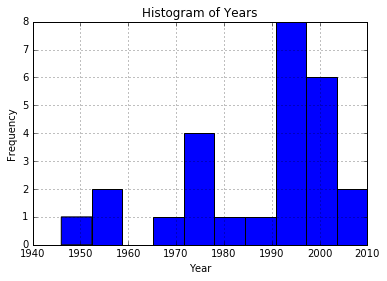

In [58]:
df.year.hist()
plt.title('Histogram of Years')
plt.xlabel('Year')
plt.ylabel('Frequency')

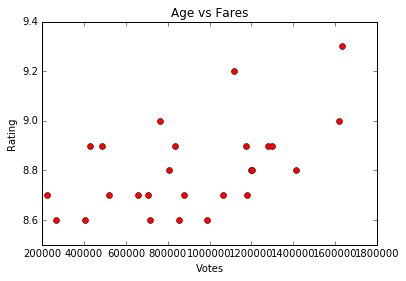

In [60]:
plt.plot(df['votes'], df['rating'], 'ro')
plt.title('Age vs Fares')
plt.xlabel('Votes')
plt.ylabel('Rating')

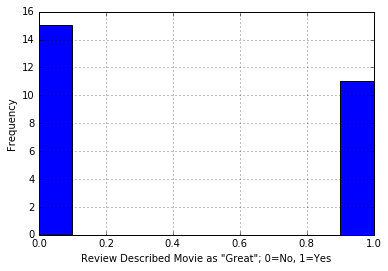

In [65]:
df.great.hist()
plt.xlabel('Review Described Movie as "Great"; 0=No, 1=Yes')
plt.ylabel('Frequency')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x11e159278>],
 'caps': [<matplotlib.lines.Line2D at 0x11e169cf8>,
 'fliers': [<matplotlib.lines.Line2D at 0x11e176da0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11e176668>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11e159c88>,
  <matplotlib.lines.Line2D at 0x11e159da0>]}

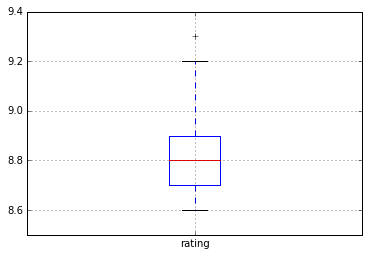

In [64]:
df.boxplot(column='rating')

## Part 3: Build the Decision Tree

#### 1. What is our target attribute? 

Our target attribute is the rating - we are looking to predict the rating based on a variety of other attributes; IE: the number of votes, and whether certain common words appeared in the reviews. 

#### 2. Prepare the data and define the training set

In [44]:
cols = df[['votes', 'year', 'excellent', 'great', 'love', 'beautiful', 'best', 'hope', 'groundbreaking', 'amazing']]
colsRes = df['rating']

In [49]:
colsRes = np.array(colsRes).astype('f8')
cols = np.array(cols).astype(int)

In [50]:
print(colsRes)

[ 9.3  9.2  9.   9.   8.9  8.9  8.9  8.9  8.9  8.9  8.8  8.8  8.8  8.8  8.7
  8.7  8.7  8.7  8.7  8.7  8.7  8.6  8.6  8.6  8.6  8.6]


#### 2. Train the Model

In [53]:
rf = RandomForestRegressor(n_estimators=100) # initialize
rf.fit(cols, colsRes)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [54]:
print(rf.feature_importances_)

[ 0.47623276  0.15066701  0.01262339  0.08365575  0.0230617   0.02639009
  0.05790877  0.02165951  0.114737    0.03306402]


#### 43 Set up test data and test the model

In [55]:
colstest = df2[['votes', 'year', 'excellent', 'great', 'love', 'beautiful', 'best', 'hope', 'groundbreaking', 'amazing']]

In [56]:
colstest = np.array(cols).astype(int)

In [61]:
results = rf.predict(colstest)

#### 5. Check the results

In [58]:
df2['predictions'] = results

In [59]:
df2.head()

,votes,rating,reference,title,year,excellent,great,love,beautiful,best,hope,groundbreaking,amazing,predictions
0,1633889,9.3,tt0111161,The Shawshank Redemption,1994,0,1,0,1,0,0,0,1,9.127
1,1118799,9.2,tt0068646,The Godfather,1972,1,1,0,0,1,0,1,0,9.064
2,762879,9.0,tt0071562,The Godfather: Part II,1974,1,1,0,0,1,0,0,1,8.915
3,1616346,9.0,tt0468569,The Dark Knight,2008,1,1,1,0,1,0,1,1,9.061
4,835155,8.9,tt0108052,Schindler's List,1993,1,1,1,1,1,1,1,1,8.855


#### 6. What is overfitting and how are we at risk? 

Overfitting is when your model is too complicated for your dataset. This can happen when the model tunes itself to the specific characteristics of your dataset, rather than learning them. In the case of our analysis, overfitting is a risk due to the small nature of the dataset. 